<h2> ВВЕДЕНИЕ</h2>

<h2>Системы для рекомендаций:</h2>
Онлайн магазины используют алгоритмы машинного обучения для анализа поведений пользователя и предложения им персонализированных рекомендаций товаров

**Преимущества**

Повышение удовлетворения клиентов, увеличение продаж, улучшение пользовательского опыта

<h2>Распознование изображений</h2>
Системы разпознования лиц используются для обеспечения безопасности в аэропортах и других общественных местах

**Преимущества**

Автоматизация процесса идентификации людей, повышения уровня безопасности

<h2>Прогнозирование спроса</h2>
Компании используют машинное обучение для предсказания будущих потребностей товара и услуг на основе исторических данных.

**Преимущества**

Оптимизация запасов, снижение затрат на хранение излишков продукции, предотвращение дефицита

<h2>Фильтрация спама</h2>
Электронная почта использует алгоритмы машинного обучения для фильтрации нежелательных сообщений

**Преимущества**

Улучшение качества работы почтовых сервисов, защита от вредоносных программ и мошенничества 

<h2>Медицинская диагностика</h2>
Машинное обучение используется для анализа медицинских изображений и выявления заболеваний на ранних стадиях.

**Преимущества**

Более точная диагностика, сокращение времени для принятия решения врачом, уменьшение количества ошибок

<h2>Классификация задач</h2>

Задачи могут относиться к различным классам в зависимости от типа проблемы:
- **Классификация** - Задача состоит в присвоении объекту одного из нескольких классов. Например, определить что за фрукт на изображении
- **Регрессия** - Задача заключается в предсказании числового значения. Например, определить стоимость того или иного товара в следующем году
- **Кластеризация** - Разделение объектов на группы(кластеры) на основе схожести их характеристик.
- **Понижение размерности** - Преобразование множества данных таким образом, чтобы уменьшить количество признаков, сохранив при этом основную информацию

**Системы для рекомендаций** - классификация

**Распознование изображений** - классификация

**Прогнозирование спроса** - регрессия 

**Фильтрация спама** - классификация

**Медицинская диагностика** - классификация

<h3>Классификация задач из введения</h3>

**Спрогнозируйте цену дома** - регрессия 

**Предсказать, вернет ли клиент кредит** - классификация

**Предсказать, когда пациенту необходимо принять лекарство** - регрессия,  если время приема лекарства можно представить как непрерывную величину (например, часы или минуты). В этом случае задача сводится к предсказанию числового значения времени. классификация,если время приема лекарства можно представить как дискретную величину (например, утро, день, вечер). В этом случае задача сводится к предсказанию категории времени.

**Выберите, какое лекарство из имеющихся в наличии следует принимать пациенту** - мультиклассовая классификация

**Выберите сегмент клиентов для промо-коммуникации** - классификация

**Распознавание дефектной продукции на производственной линии (на основе сканирования фотографий)** - классификация

**Решите, как разместить продукты на полке в магазине** - кластеризация

**Поиск сайтов для ввода текстового запроса** - классификация, потому что мы пытаемся отнести каждый сайт к одной из заранее определенных категорий

**Разделите покупателей магазина на сегменты, чтобы понять различия в их поведении** - кластеризация

**Обнаружение аномалий в трафике сайта** - Кластеризация — если у нас нет размеченных данных и мы хотим автоматически обнаружить аномалии на основе внутренних закономерностей данных, или классификация, — если у нас есть размеченные данные с примерами нормального и аномального трафика.

<h2>Разница между мультиклассовой и multilabel классификацией:</h2>

**Мультиклассовая классификация:** каждый образец может принадлежать только к одному из классов из множества возможных. Например, классификация фруктов.

**Multilabel классификация:** один образец может принадлежать к нескольким классам. Например, фотография может содержать в себе человека, машину и лес.

<h2>Является ли пример с ценами на жильё из теории классификацией задачи регрессии? Можно ли свести задачу регрессии к классификации?
</h2>

Да, эта задача относится к задаче регрессии, так как требуется предсказание численного значения (цены жилья). Однако её можно свести к задаче классификации, если разбить диапазон возможных цен на интервалы и считать каждый интервал отдельным классом. Но такой подход обычно менее эффективен, поскольку теряется точность предсказаний.

In [117]:
import pandas as pd
import numpy as np
from sklearn import linear_model, tree, metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import lightgbm as lgb
import scipy.stats as st
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [118]:
train_data = pd.read_json('train.json')

In [119]:
print(f"Тренировочные данные:{train_data.shape}")

Тренировочные данные:(49352, 15)


In [120]:
print(f"Столбцы train{train_data.columns}")


Столбцы trainIndex(['bathrooms', 'bedrooms', 'building_id', 'created', 'description',
       'display_address', 'features', 'latitude', 'listing_id', 'longitude',
       'manager_id', 'photos', 'price', 'street_address', 'interest_level'],
      dtype='object')


info() - метод предоставляет общую информацию о DataFrame, включая количество строк и столбцов, типы данных каждого столбца, количество не пустых значений в каждом столбце и количество используемых памяти.

In [121]:
print(train_data.info())


<class 'pandas.core.frame.DataFrame'>
Index: 49352 entries, 4 to 124009
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        49352 non-null  float64
 1   bedrooms         49352 non-null  int64  
 2   building_id      49352 non-null  object 
 3   created          49352 non-null  object 
 4   description      49352 non-null  object 
 5   display_address  49352 non-null  object 
 6   features         49352 non-null  object 
 7   latitude         49352 non-null  float64
 8   listing_id       49352 non-null  int64  
 9   longitude        49352 non-null  float64
 10  manager_id       49352 non-null  object 
 11  photos           49352 non-null  object 
 12  price            49352 non-null  int64  
 13  street_address   49352 non-null  object 
 14  interest_level   49352 non-null  object 
dtypes: float64(3), int64(3), object(9)
memory usage: 6.0+ MB
None


describe() -  Этот метод возвращает сводную статистику для числовых столбцов в DataFrame. Он включает такие показатели, как количество наблюдений, среднее значение, стандартное отклонение, минимальное и максимальное значения, а также квартили.

In [122]:
print(train_data.describe())

         bathrooms      bedrooms      latitude    listing_id     longitude  \
count  49352.00000  49352.000000  49352.000000  4.935200e+04  49352.000000   
mean       1.21218      1.541640     40.741545  7.024055e+06    -73.955716   
std        0.50142      1.115018      0.638535  1.262746e+05      1.177912   
min        0.00000      0.000000      0.000000  6.811957e+06   -118.271000   
25%        1.00000      1.000000     40.728300  6.915888e+06    -73.991700   
50%        1.00000      1.000000     40.751800  7.021070e+06    -73.977900   
75%        1.00000      2.000000     40.774300  7.128733e+06    -73.954800   
max       10.00000      8.000000     44.883500  7.753784e+06      0.000000   

              price  
count  4.935200e+04  
mean   3.830174e+03  
std    2.206687e+04  
min    4.300000e+01  
25%    2.500000e+03  
50%    3.150000e+03  
75%    4.100000e+03  
max    4.490000e+06  


corr -  Этот метод вычисляет корреляционную матрицу для числовых столбцов в DataFrame. Корреляция показывает степень линейной зависимости между двумя переменными.

In [123]:
numeric_columns = train_data.select_dtypes(include=[np.number]).columns
print(train_data[numeric_columns].corr())

            bathrooms  bedrooms  latitude  listing_id  longitude     price
bathrooms    1.000000  0.533446 -0.009657    0.000776   0.010393  0.069661
bedrooms     0.533446  1.000000 -0.004745    0.011968   0.006892  0.051788
latitude    -0.009657 -0.004745  1.000000    0.001712  -0.966807 -0.000707
listing_id   0.000776  0.011968  0.001712    1.000000  -0.000907  0.008090
longitude    0.010393  0.006892 -0.966807   -0.000907   1.000000 -0.000087
price        0.069661  0.051788 -0.000707    0.008090  -0.000087  1.000000


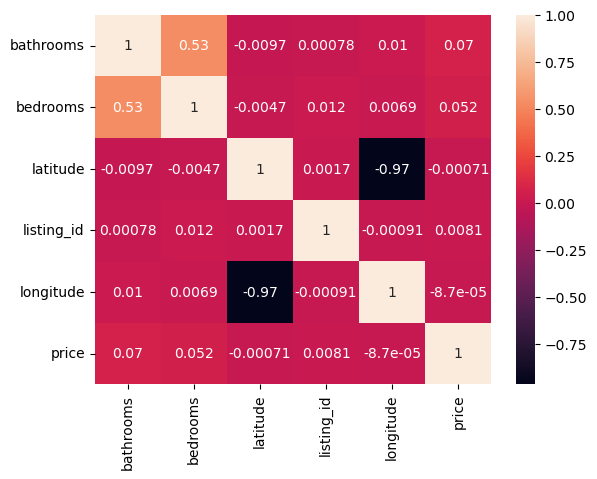

In [124]:
# Вычисление корреляции только для числовых столбцов
corr_matrix = train_data[numeric_columns].corr()
# Построение тепловой карты
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [125]:
print(train_data.isnull().sum())

bathrooms          0
bedrooms           0
building_id        0
created            0
description        0
display_address    0
features           0
latitude           0
listing_id         0
longitude          0
manager_id         0
photos             0
price              0
street_address     0
interest_level     0
dtype: int64


In [126]:
features = ['bathrooms', 'bedrooms', 'interest_level']
target = ['price']

new_train_data = train_data[features + target]

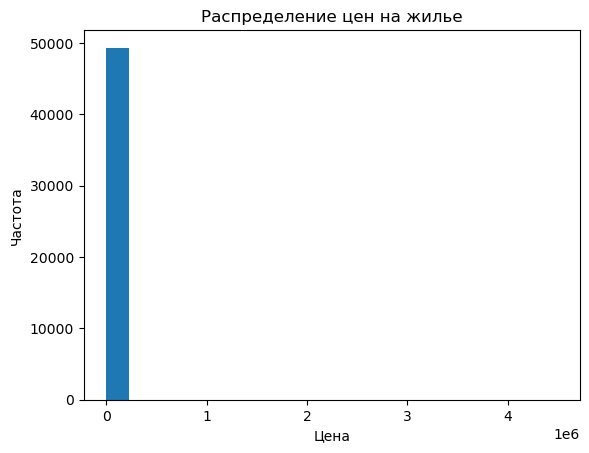

In [127]:
plt.hist(new_train_data['price'], bins=20)
plt.xlabel('Цена')
plt.ylabel('Частота')
plt.title('Распределение цен на жилье')
plt.show()

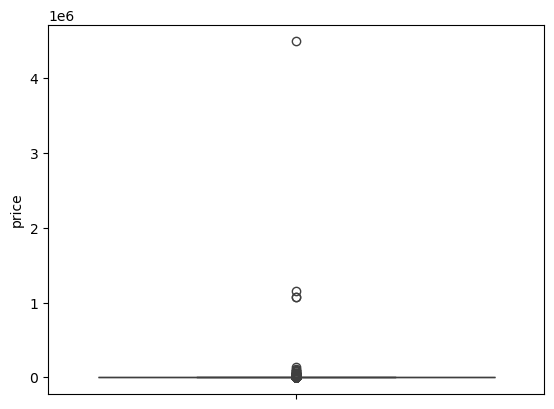

In [128]:
sns.boxplot(y=new_train_data['price'])
plt.show()

In [129]:
q1 = new_train_data['price'].quantile(0.01)
q99 = new_train_data['price'].quantile(0.99)
new_train_data = new_train_data[(new_train_data['price'] >= q1) & (new_train_data['price'] <= q99)]

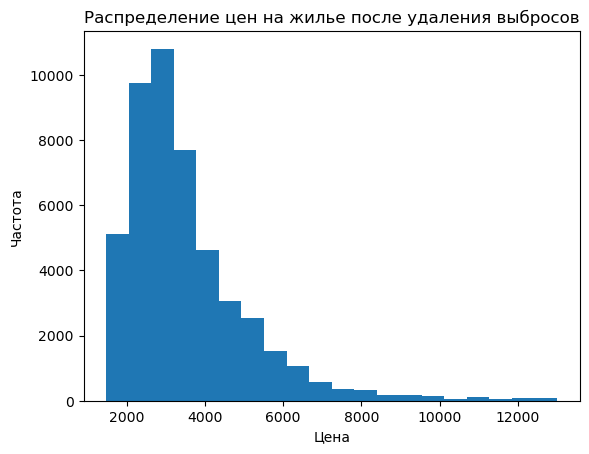

In [130]:
plt.hist(new_train_data['price'], bins=20)
plt.xlabel('Цена')
plt.ylabel('Частота')
plt.title('Распределение цен на жилье после удаления выбросов')
plt.show()

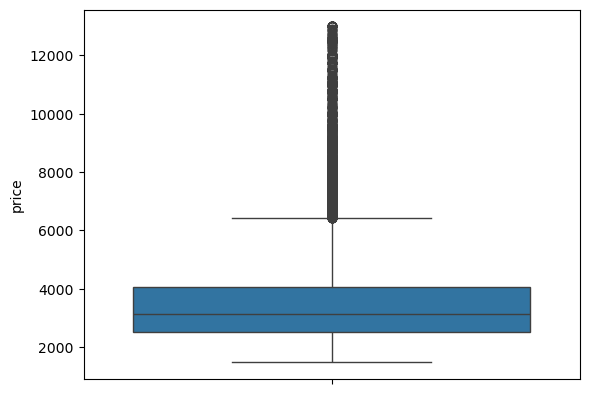

In [131]:
sns.boxplot(y=new_train_data['price'])
plt.show()

In [132]:
print(new_train_data['interest_level'].dtype)

object


In [133]:
print(new_train_data['interest_level'].value_counts())

interest_level
low       33697
medium    11116
high       3566
Name: count, dtype: int64


In [134]:
new_train_data['interest_level'] = new_train_data['interest_level'].replace({'low': 0, 'medium': 1, 'high': 2})

C:\Users\ryasc\AppData\Local\Temp\ipykernel_15508\2511129547.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new_train_data['interest_level'] = new_train_data['interest_level'].replace({'low': 0, 'medium': 1, 'high': 2})


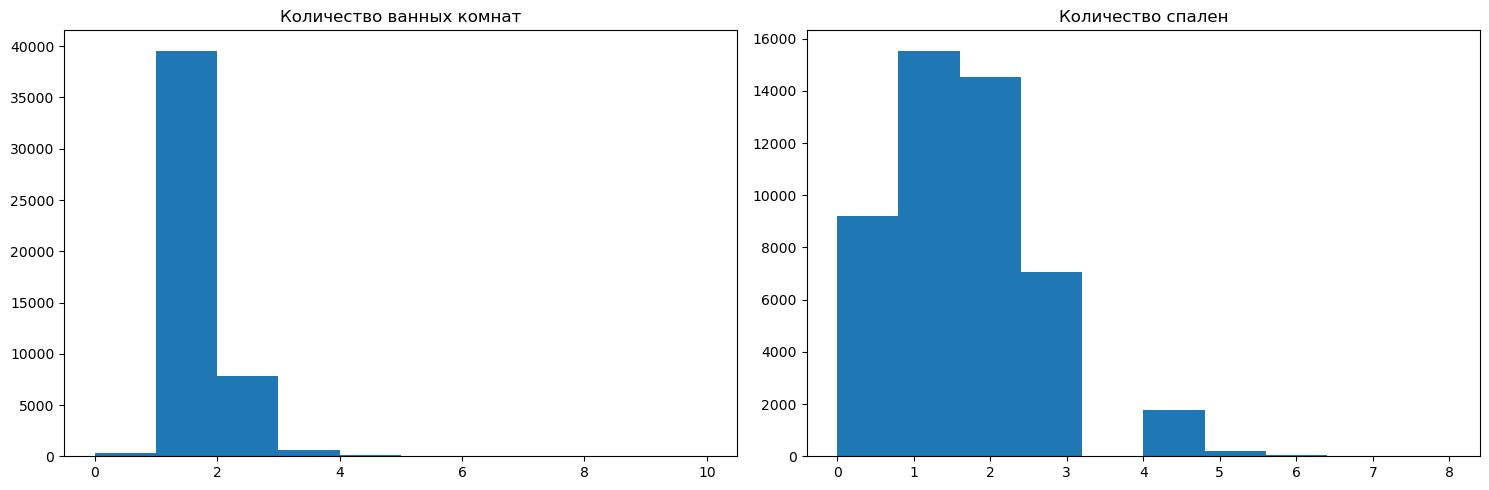

In [135]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].hist(new_train_data['bathrooms'], bins=10)
axs[0].set_title('Количество ванных комнат')
axs[1].hist(new_train_data['bedrooms'], bins=10)
axs[1].set_title('Количество спален')


plt.tight_layout()
plt.show()

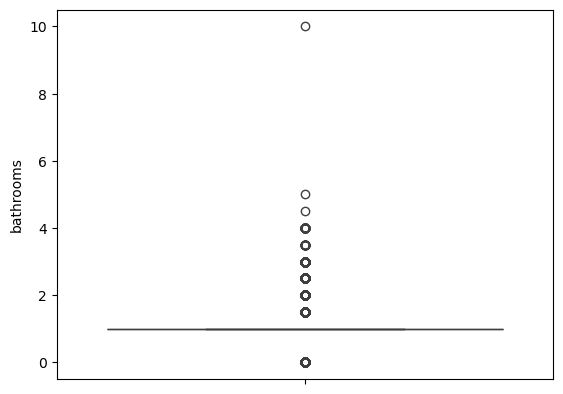

In [136]:
sns.boxplot(y=new_train_data['bathrooms'])
plt.show()

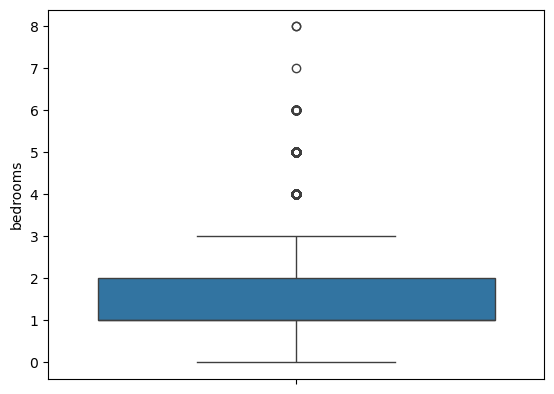

In [137]:
sns.boxplot(y=new_train_data['bedrooms'])
plt.show()

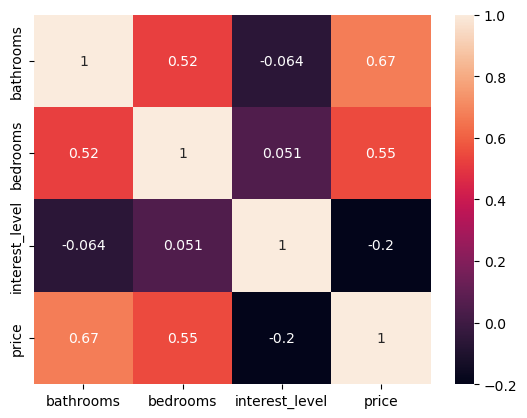

In [138]:
corr_matrix = new_train_data.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

На гистограмме видна корреляция между стоимостью жилья и уровнем интереса к нему. Например, ванные комнаты с более высоким уровнем интереса имеют тенденцию стоить дороже. То же самое можно сказать и про спальни, хотя распределение цен и уровней интереса более разнообразно.

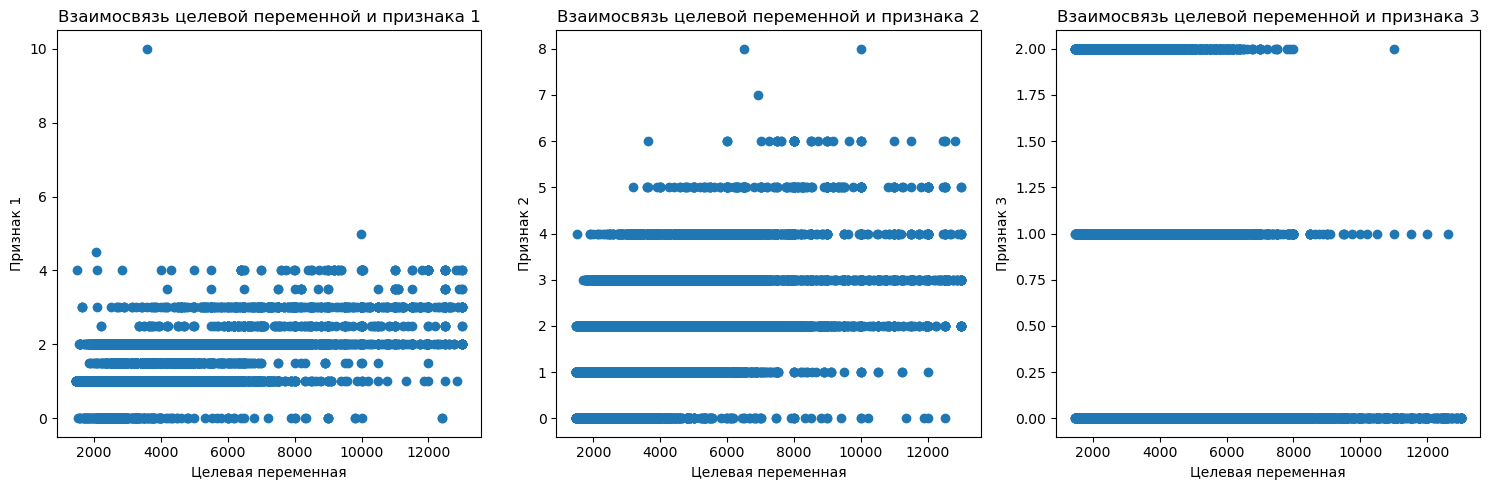

In [139]:
# Построение диаграмм рассеяния
plt.figure(figsize=(15, 5))

# Диаграмма для feature1
plt.subplot(1, 3, 1)
plt.scatter(new_train_data['price'], new_train_data['bathrooms'])
plt.xlabel('Целевая переменная')
plt.ylabel('Признак 1')
plt.title('Взаимосвязь целевой переменной и признака 1')

# Диаграмма для feature2
plt.subplot(1, 3, 2)
plt.scatter(new_train_data['price'], new_train_data['bedrooms'])
plt.xlabel('Целевая переменная')
plt.ylabel('Признак 2')
plt.title('Взаимосвязь целевой переменной и признака 2')

# Диаграмма для feature3
plt.subplot(1, 3, 3)
plt.scatter(new_train_data['price'], new_train_data['interest_level'])
plt.xlabel('Целевая переменная')
plt.ylabel('Признак 3')
plt.title('Взаимосвязь целевой переменной и признака 3')

plt.tight_layout()
plt.show()

In [140]:
new_train_data['bathrooms_squared'] = new_train_data['bathrooms'] ** 2
new_train_data['bedrooms_squared'] = new_train_data['bedrooms'] ** 2
new_train_data['interest_level_squared'] = new_train_data['interest_level'] ** 2


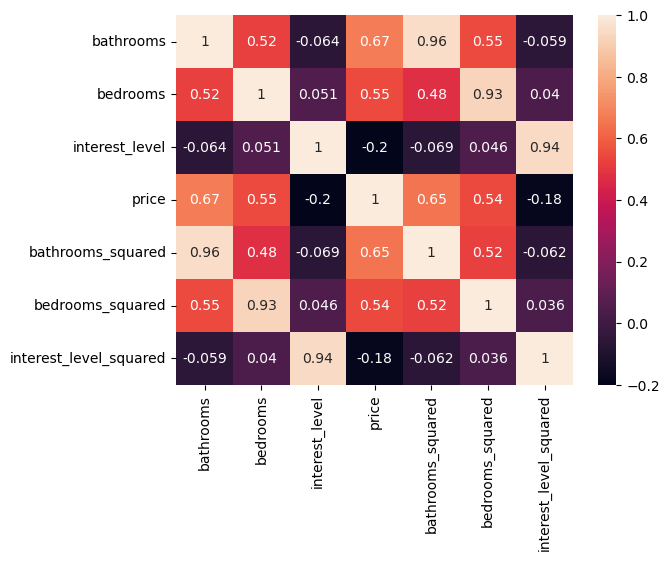

In [141]:
corr_matrix = new_train_data.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [142]:
X_train, X_test, y_train, y_test = train_test_split(new_train_data[features], new_train_data[target], test_size=0.2, random_state=42)


In [143]:
poly = PolynomialFeatures(degree=10)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

Здесь создается объект класса PolynomialFeatures, который позволяет преобразовать исходные признаки в новые полиномиальные признаки до заданной степени. В данном случае степень равна 10, что означает, что будут созданы все возможные комбинации исходных признаков вплоть до десятой степени.

Таким образом, использование полиномиальных признаков помогает учесть нелинейную зависимость между признаками и целевой переменной, что может улучшить точность моделей машинного обучения, особенно в случаях, когда данные имеют сложную структуру.

In [144]:
lin_reg = linear_model.LinearRegression()
lin_reg.fit(X_train_poly, y_train)
y_pred_train = lin_reg.predict(X_train_poly)
y_pred_test = lin_reg.predict(X_test_poly)

mae_train = metrics.mean_absolute_error(y_train, y_pred_train)
rmse_train = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))
mae_test = metrics.mean_absolute_error(y_test, y_pred_test)
rmse_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

result_MAE = pd.DataFrame(columns=['model', 'training', 'testing'])
result_RMSE = pd.DataFrame(columns=['model', 'training', 'testing'])

result_MAE.loc[len(result_MAE)] = ['linear_regression', mae_train, mae_test]
result_RMSE.loc[len(result_RMSE)] = ['linear_regression', rmse_train, rmse_test]

In [145]:
tree_reg = tree.DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train_poly, y_train)
y_pred_train = tree_reg.predict(X_train_poly)
y_pred_test = tree_reg.predict(X_test_poly)

mae_train = metrics.mean_absolute_error(y_train, y_pred_train)
rmse_train = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))
mae_test = metrics.mean_absolute_error(y_test, y_pred_test)
rmse_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

result_MAE.loc[len(result_MAE)] = ['decision_tree', mae_train, mae_test]
result_RMSE.loc[len(result_RMSE)] = ['decision_tree', rmse_train, rmse_test]

In [146]:
mean_train = y_train.mean()
median_train = y_train.median()
mean_test = y_test.mean()
median_test = y_test.median()

y_pred_train_mean = np.full(len(y_train), mean_train)
y_pred_test_mean = np.full(len(y_test), mean_test)
y_pred_train_median = np.full(len(y_train), median_train)
y_pred_test_median = np.full(len(y_test), median_test)

mae_train_mean = metrics.mean_absolute_error(y_train, y_pred_train_mean)
rmse_train_mean = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train_mean))
mae_test_mean = metrics.mean_absolute_error(y_test, y_pred_test_mean)
rmse_test_mean = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_mean))

mae_train_median = metrics.mean_absolute_error(y_train, y_pred_train_median)
rmse_train_median = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train_median))
mae_test_median = metrics.mean_absolute_error(y_test, y_pred_test_median)
rmse_test_median = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_median))

result_MAE.loc[len(result_MAE)] = ['native_mean', mae_train_mean, mae_test_mean]
result_RMSE.loc[len(result_RMSE)] = ['native_mean', rmse_train_mean, rmse_test_mean]
result_MAE.loc[len(result_MAE)] = ['native_median', mae_train_median, mae_test_median]
result_RMSE.loc[len(result_RMSE)] = ['native_median', rmse_train_median, rmse_test_median]

In [147]:
print("MAE:")
display(result_MAE)
print("\nRMSE:")
display(result_RMSE)

MAE:


,model,training,testing
0,linear_regression,721.858243,863.826030
1,decision_tree,721.858239,724.501587
2,native_mean,1137.760556,1144.894703
3,native_median,1084.589257,1092.676933



RMSE:


,model,training,testing
0,linear_regression,1031.275393,12221.257020
1,decision_tree,1031.275393,1042.951678
2,native_mean,1599.229452,1591.287957
3,native_median,1645.449541,1635.717764


<h2>Самая лучшая модель - decision tree</h2>